# PROJECT PENERAPAN ALGORITMA CNN UNTUK MENDETEKSI TULISAN TANGAN ANGKA ROMAWI DENGAN AUGMENTASI DATA

NAMA   : MOCHAMMAD TOYIB <BR>
NIM    : 2121400015 <BR>
MATKUL : DEEP LEARNING

##MENGECEK STATUS TENSORFLOW

In [ ]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Periksa versi TensorFlow
assert LooseVersion(tf.__version__) > LooseVersion("1.0"), "TensorFlow versi harus lebih dari 1.0"
print("TensorFlow Version: {}".format(tf.__version__))

# Periksa apakah GPU tersedia
if not tf.test.gpu_device_name():
    warnings.warn("No GPU Found: Please ensure you have installed TensorFlow correctly")
else:
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))

TensorFlow Version: 2.15.0
Default GPU Device: /device:GPU:0


<ipython-input-2-d5606cf3ba7f>:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  assert LooseVersion(tf.__version__) > LooseVersion("1.0"), "TensorFlow versi harus lebih dari 1.0"


###KODE BANTUIN PROGRAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf /content/dataset /content/data

In [ ]:
!unzip /content/dataset_fix.zip -d /content/data

In [ ]:
import shutil

# Tentukan path asal folder
source_path = '/content/drive/MyDrive/Angka_Romawi02/model_300_0.958_0.961.keras'

# Tentukan path tujuan folder
destination_path = '/content'

# Menyalin folder
shutil.copy(source_path, destination_path)


'/content/model_300_0.958_0.961.keras'

##IMPORT LIBRARY

In [ ]:
# Arsitektur CNN
from tensorflow.keras import layers, models, callbacks

# Generator dan Praproses Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Fungsi Loss
from keras.metrics import sparse_categorical_crossentropy

# Visualisasi
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan Direktori
import os

# Log
import pandas as pd

##PRA-PELATIHAN

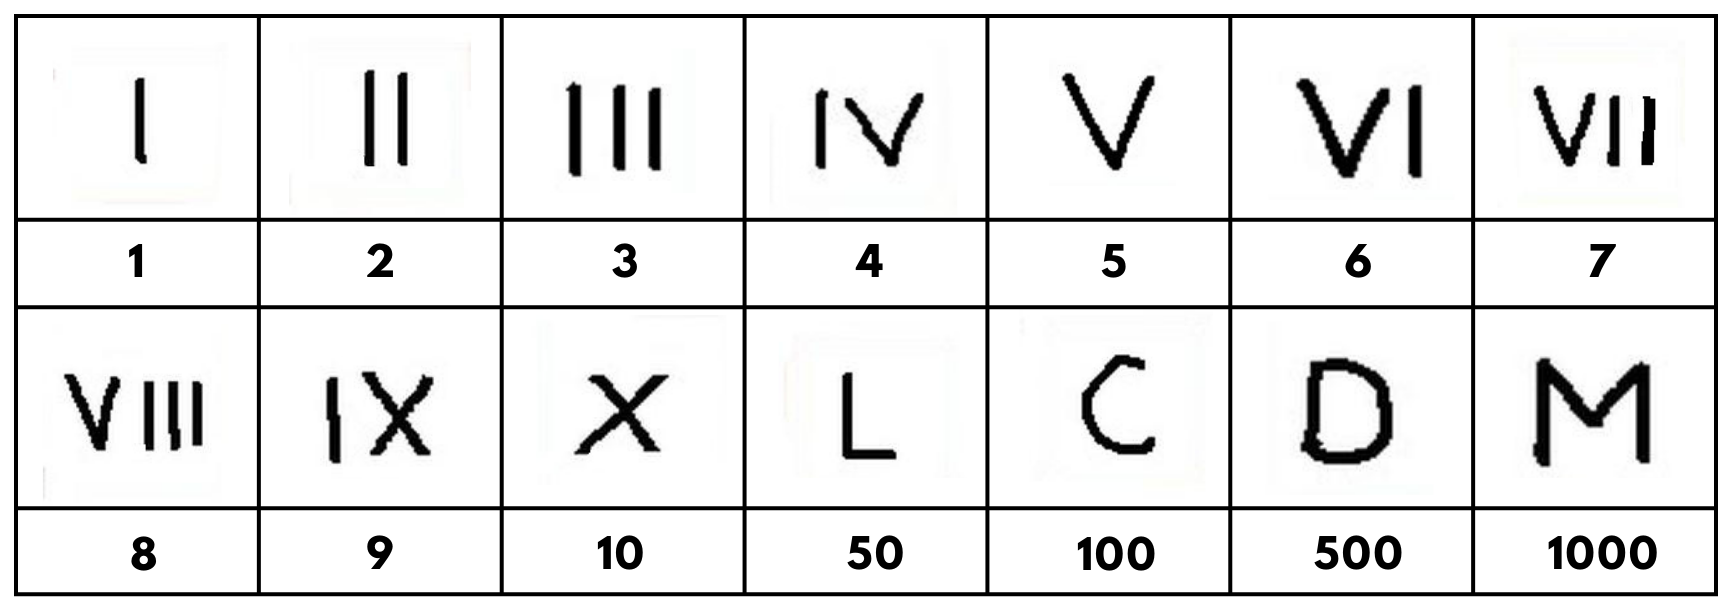##PRA-PELATIHAN

In [ ]:
# Membuat nama kelas berdasarkan urutan folder
class_names = [1, 10, 100, 1000, 2, 3, 4, 5, 50, 500, 6, 7, 8, 9]

In [ ]:
import sys
from PIL import Image

# Memastikan bahwa 'Image' tersedia dalam sys.modules
sys.modules['Image'] = Image

##ARSITEKTURE CNN

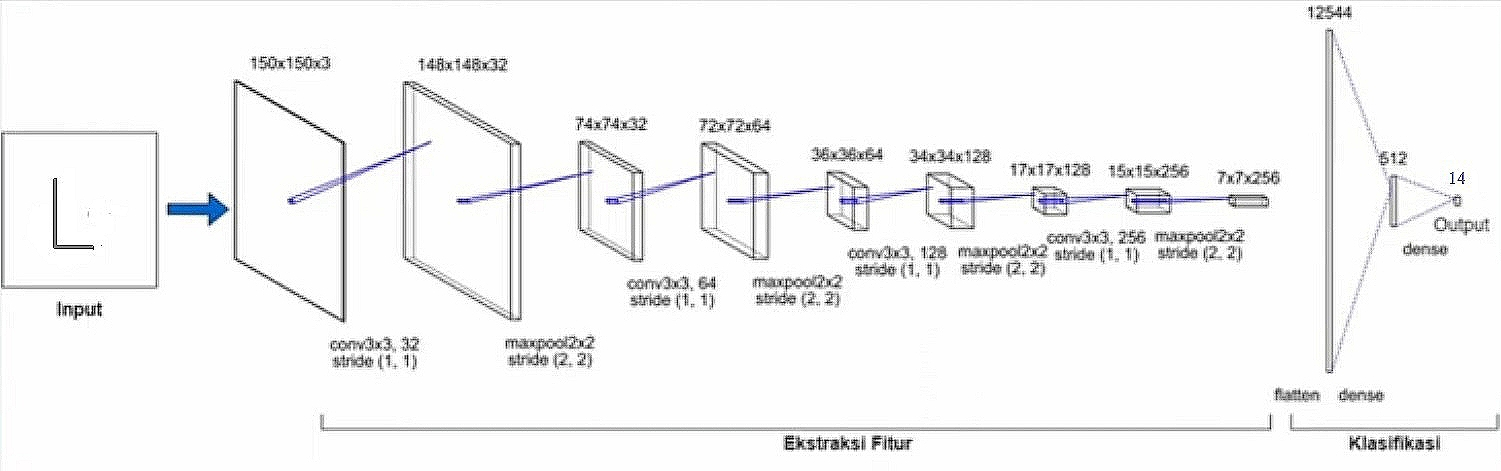##ARSITEKTUR CNN

In [ ]:
# Membuat arsitektur CNN
model = models.Sequential()

# Menambahkan lapisan konvolusi dan max pooling
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

# Menambahkan lapisan flatten dan dense
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

# Melihat detail arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

##DATASET | PRAPROSES DAN AUGMENTASI

In [ ]:
# Pengaturan direktori
PATH = '/content/drive/MyDrive/Angka_Romawi02/dataset'
VAL_DATA = 'test_mixed'
TRAIN_DATA = 'train'
TOTAL_TRAIN_DATA = 14 * 80  # 14 folder dengan masing-masing 56 gambar
TOTAL_VAL_DATA = 14 * 20    # 14 folder dengan masing-masing 14 gambar
TRAIN_DIR = os.path.join(PATH, TRAIN_DATA)
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 80
IMG_SIZE = (150, 150)

# Membuat generator pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
)

# Membuat instance ImageDataGenerator untuk validasi
validation_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator validasi
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
)

# i = 0
# for batch in train_datagen.flow_from_directory(
#     TRAIN_DIR,
#     batch_size=BATCH_SIZE,
#     class_mode='sparse',
#     target_size=IMG_SIZE,
#     color_mode='rgb',
#     save_to_dir='/content/augmented',
#     save_prefix='aug',
#     save_format='jpg'
# ):
#     i += 1
#     if i > 0:
#         break

# print(train_generator.n // train_generator.batch_size)
# print(validation_generator.n // validation_generator.batch_size)



Found 1120 images belonging to 14 classes.
Found 280 images belonging to 14 classes.


##PELATIHAN

In [ ]:
# Callback untuk menyimpan model setiap epoch
model_save_callback = callbacks.ModelCheckpoint(
    'models/model_{epoch:02d}_{val_accuracy:.3f}_{accuracy:.3f}.keras',
    save_best_only=False,
    save_weights_only=False,
    monitor='val_accuracy',
    verbose=1
)

# Inisialisasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Pelatihan!
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=300,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[model_save_callback]
)

Epoch 1/300
14/14 [==============================] - ETA: 0s - loss: 2.7193 - accuracy: 0.0741
Epoch 1: saving model to models/model_01_0.087_0.074.keras
14/14 [==============================] - 14s 461ms/step - loss: 2.7193 - accuracy: 0.0741 - val_loss: 2.6347 - val_accuracy: 0.0875
Epoch 2/300
14/14 [==============================] - ETA: 0s - loss: 2.6293 - accuracy: 0.0848
Epoch 2: saving model to models/model_02_0.096_0.085.keras
14/14 [==============================] - 10s 690ms/step - loss: 2.6293 - accuracy: 0.0848 - val_loss: 2.5533 - val_accuracy: 0.0958
Epoch 3/300
14/14 [==============================] - ETA: 0s - loss: 2.4242 - accuracy: 0.1714
Epoch 3: saving model to models/model_03_0.438_0.171.keras
14/14 [==============================] - 7s 501ms/step - loss: 2.4242 - accuracy: 0.1714 - val_loss: 1.6543 - val_accuracy: 0.4375
Epoch 4/300
14/14 [==============================] - ETA: 0s - loss: 1.9746 - accuracy: 0.3179
Epoch 4: saving model to models/model_04_0.533_0

##VISUALISASI METRIK

### MENYIMPAN VISUALISASI METRIK

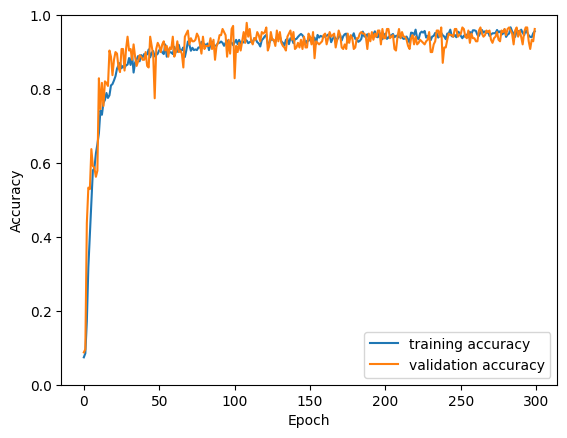

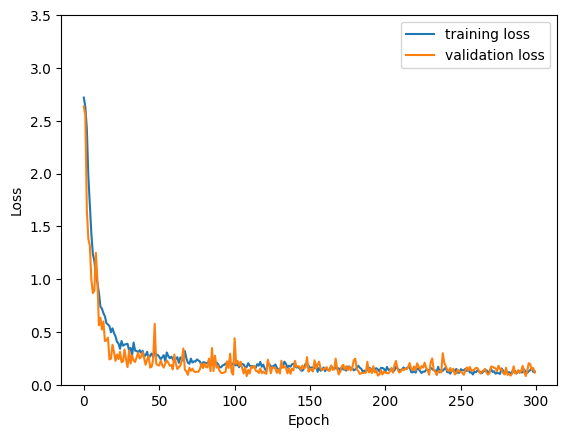

In [ ]:
# Menyimpan history pelatihan
pd.DataFrame(history.history).to_csv("history.csv")

# Visualisasi metrik akurasi selama pelatihan
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.savefig('train_val_acc_augmentation.png')
plt.show()

# Visualisasi metrik loss selama pelatihan
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3.5])
plt.legend(loc="upper right")
plt.savefig('train_val_loss_augmentation.png')
plt.show()

### MEMBACA VISUALISAI METRIKS

In [ ]:
# Membaca history pelatihan dari file CSV
history_path = '/content/drive/MyDrive/Angka_Romawi/history.csv'
history = pd.read_csv(history_path)

# Visualisasi metrik akurasi selama pelatihan
plt.plot(history['accuracy'], label='training accuracy')
plt.plot(history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.savefig('train_val_acc_augmentation.png')
plt.show()

# Visualisasi metrik loss selama pelatihan
plt.plot(history['loss'], label='training loss')
plt.plot(history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3.5])
plt.legend(loc="upper right")
plt.savefig('train_val_loss_augmentation.png')
plt.show()

##EVALUASI MODEL

In [ ]:
# Memuat model terbaik dari file .keras
loaded_model = models.load_model('/content/drive/MyDrive/Angka_Romawi02/model_300_0.958_0.961.keras')

In [ ]:
# Membuat fungsi untuk memuat dan praproses gambar untuk pengujian
def load_image(img_path):
    # Memuat gambar dengan ukuran target
    img = load_img(img_path, target_size=(150, 150))
    # Mengubah gambar menjadi array
    img_tensor = img_to_array(img)
    # Menambahkan dimensi batch ke array
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # Normalisasi gambar
    img_tensor /= 255.0

    return img_tensor

In [ ]:
# Membuat generator untuk data uji seperti yang dilakukan sebelum pelatihan
PATH = '/content/drive/MyDrive/Angka_Romawi02/dataset'
VAL_DATA = 'test_mixed'
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)
BATCH_SIZE = 80
IMG_SIZE = (150, 150)

# Inisialisasi ImageDataGenerator dengan rescale
validation_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator validasi
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
)

Found 280 images belonging to 14 classes.


In [ ]:
# Definisikan daftar nama kelas
class_names = [1, 10, 100, 1000, 2, 3, 4, 5, 50, 500, 6, 7, 8, 9]

# Menampilkan kelas beserta indeks kelasnya
for index, class_name in enumerate(class_names):
    print("Angka Input: {},  |  Indeks kelas: {}".format(class_name, index))


Angka Input: 1,  |  Indeks kelas: 0
Angka Input: 10,  |  Indeks kelas: 1
Angka Input: 100,  |  Indeks kelas: 2
Angka Input: 1000,  |  Indeks kelas: 3
Angka Input: 2,  |  Indeks kelas: 4
Angka Input: 3,  |  Indeks kelas: 5
Angka Input: 4,  |  Indeks kelas: 6
Angka Input: 5,  |  Indeks kelas: 7
Angka Input: 50,  |  Indeks kelas: 8
Angka Input: 500,  |  Indeks kelas: 9
Angka Input: 6,  |  Indeks kelas: 10
Angka Input: 7,  |  Indeks kelas: 11
Angka Input: 8,  |  Indeks kelas: 12
Angka Input: 9,  |  Indeks kelas: 13


##PENGUJIAN MANUAL

Nama angka: 8
1/1 [==============================] - 0s 38ms/step
Indeks kelas prediksi:  12


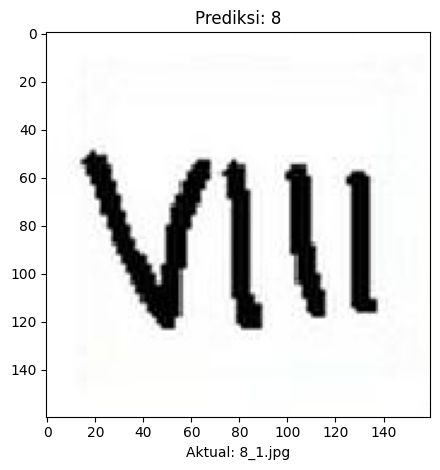

In [ ]:
# Memuat data uji berdasarkan nama angka
huruf = input("Nama angka: ")
img_path = '/content/drive/MyDrive/Angka_Romawi02/dataset/' + VAL_DATA + '/' + huruf + '/' + huruf + '_1.jpg'
new_image = load_image(img_path)

# Melakukan prediksi
pred = loaded_model.predict(new_image)
print("Indeks kelas prediksi: ", np.argmax(pred))

# Menampilkan gambar dan prediksi
img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[-1])
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 18ms/step
Indeks kelas prediksi:  1


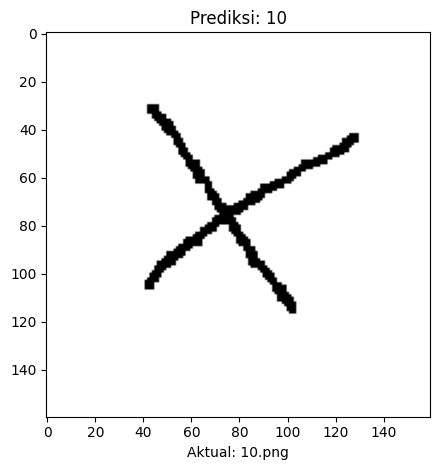

In [ ]:
# Memuat data uji berdasarkan tulisan tangan angka romawi

img_path = '/content/drive/MyDrive/Angka_Romawi02/Coba/10.png'
new_image = load_image(img_path)

# Melakukan prediksi
pred = loaded_model.predict(new_image)
print("Indeks kelas prediksi: ", np.argmax(pred))

# Menampilkan gambar dan prediksi
img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[-1])
plt.tight_layout()
plt.show()

##PENGUJIAN GUI

FileUpload(value={}, accept='.jpg,.png', description='Upload')

Button(description='Proses dan Prediksi', style=ButtonStyle())

1/1 [==============================] - 0s 118ms/step
Indeks kelas prediksi:  6


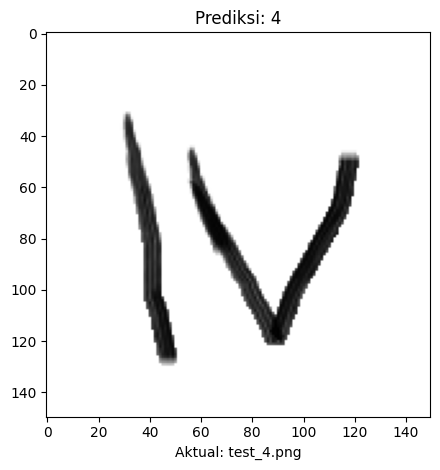

In [ ]:
import os
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Membuat widget FileUpload
fileselect = widgets.FileUpload(accept='.jpg,.png', multiple=False)
display(fileselect)

# Membuat folder untuk menyimpan gambar yang diunggah
upload_dir = 'uploads'
os.makedirs(upload_dir, exist_ok=True)

# Fungsi untuk menyimpan file yang diunggah ke folder
def save_uploaded_file(upload):
    for name, file_info in upload.value.items():
        with open(os.path.join(upload_dir, name), 'wb') as f:
            f.write(file_info['content'])
        return os.path.join(upload_dir, name)
    return None

# Fungsi untuk memuat dan menampilkan gambar setelah diunggah
def load_image(img_path, target_size=(150, 150)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Misalkan class_names adalah daftar nama kelas yang digunakan oleh model Anda
class_names = [1, 10, 100, 1000, 2, 3, 4, 5, 50, 500, 6, 7, 8, 9]  # ganti dengan nama kelas yang sesuai

# Misalkan loaded_model adalah model yang sudah dilatih dan dimuat
loaded_model = load_model('/content/drive/MyDrive/Angka_Romawi02/model_300_0.958_0.961.keras')  # ganti dengan path model Anda

# Fungsi untuk memproses dan memprediksi gambar setelah diunggah
def process_and_predict(upload):
    img_path = save_uploaded_file(upload)
    if img_path:
        new_image = load_image(img_path)

        # Melakukan prediksi
        pred = loaded_model.predict(new_image)
        pred *= 100
        print("Indeks kelas prediksi: ", np.argmax(pred))

        # Menampilkan gambar dan prediksi
        img = load_img(img_path, target_size=(150, 150))
        plt.imshow(img)
        plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
        plt.xlabel("Aktual: " + os.path.basename(img_path))
        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ada file yang diunggah.")

# Tombol untuk memproses prediksi
button = widgets.Button(description="Proses dan Prediksi")
display(button)

def on_button_clicked(b):
    process_and_predict(fileselect)

button.on_click(on_button_clicked)
